In [1]:
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import gan

cuda = torch.cuda.is_available()

print("Cuda: " + str(cuda))
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Cuda: True
Cuda: True


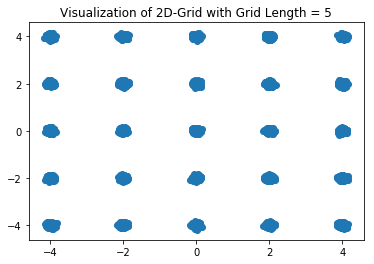

In [2]:
# here's what the 2D-Grid looks like
num_samples = 10000
grid_length = 5
samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.title("Visualization of 2D-Grid with Grid Length = %d" % grid_length)
plt.scatter(*zip(*samples))

[Epoch 0/10000] [Discriminator Loss: 0.626492] [Generator Loss: 0.706083]


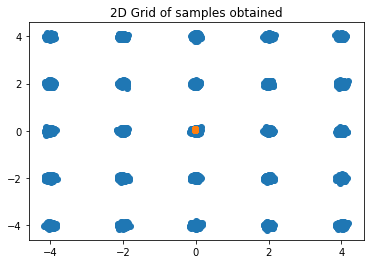

[Epoch 1000/10000] [Discriminator Loss: 0.633279] [Generator Loss: 0.735967]


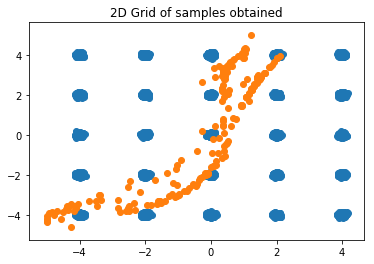

[Epoch 2000/10000] [Discriminator Loss: 0.762791] [Generator Loss: 0.658519]


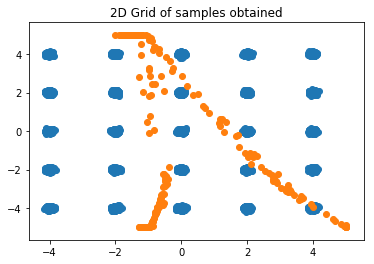

[Epoch 3000/10000] [Discriminator Loss: 0.685753] [Generator Loss: 0.674576]


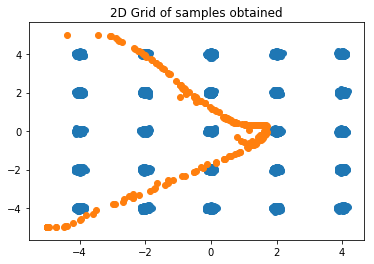

[Epoch 4000/10000] [Discriminator Loss: 0.676532] [Generator Loss: 0.689429]


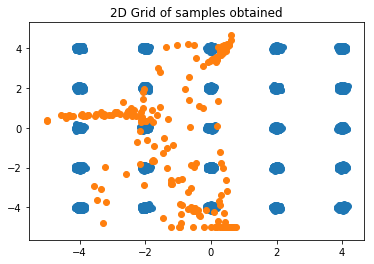

[Epoch 5000/10000] [Discriminator Loss: 0.843559] [Generator Loss: 0.664545]


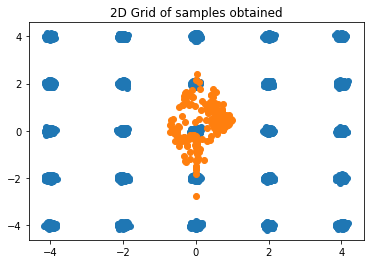

[Epoch 6000/10000] [Discriminator Loss: 0.670977] [Generator Loss: 0.691907]


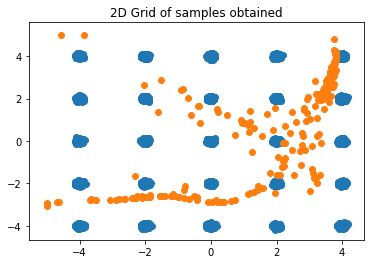

[Epoch 7000/10000] [Discriminator Loss: 0.727604] [Generator Loss: 0.650705]


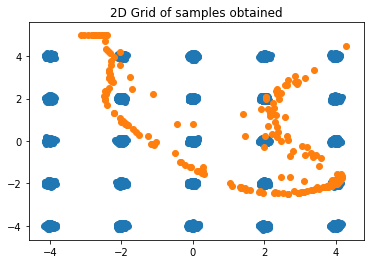

[Epoch 8000/10000] [Discriminator Loss: 0.700513] [Generator Loss: 0.669951]


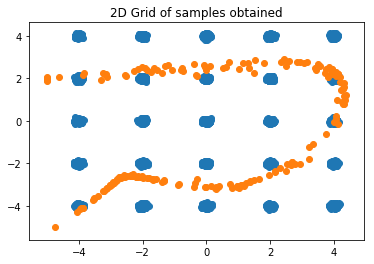

[Epoch 9000/10000] [Discriminator Loss: 0.724447] [Generator Loss: 0.701845]


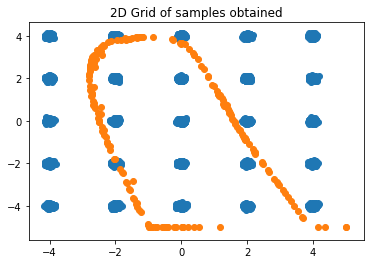

Grid length = 5


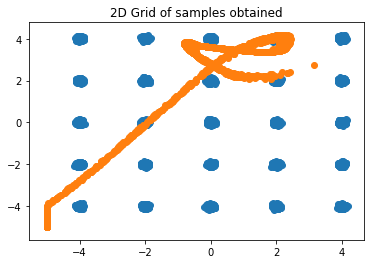

In [3]:
# run this cell only if you want to train a different GAN

# experiment parameters
num_samples = 10000 # for plotting
num_epochs = 10000
num_samples_per_batch = 5
grid_length = 5
var = 0.0025
latent_dim = 2

gen = gan.train(save_model=True, filename="meh_generator_2018_07_11",
                num_samples=num_samples, num_epochs=num_epochs, 
                num_samples_per_batch=num_samples_per_batch, 
                grid_length=grid_length, var=var, latent_dim=latent_dim,
                layer_width=40)

plt.clf()

# underlay of true distribution
real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

# look at some samples
num_samples_to_test = 2000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained")
plt.scatter(*(zip(*np_samples)))

print("Grid length = %d" % grid_length)

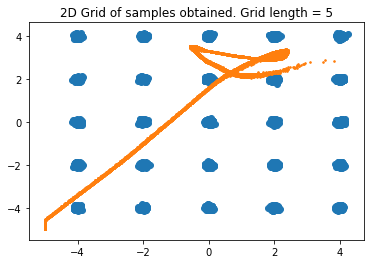

In [4]:
# load the model back and sample from it
latent_dim = 2
# loaded_gen = gan.load_model("good_generator_2018_07_11").eval()
loaded_gen = gan.load_model("meh_generator_2018_07_11").eval()

plt.clf()

real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

num_samples_to_test = 20000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = loaded_gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained. Grid length = %d" % grid_length)
plt.scatter(*zip(*np_samples), s=2.5)

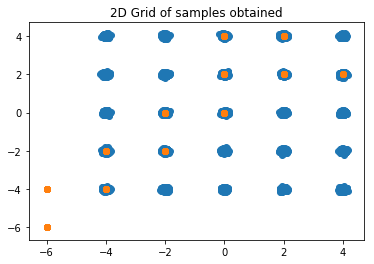

In [5]:
plt.clf()
real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

num_samples_to_test = 20000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = loaded_gen(z).cpu().detach().numpy()
np_samples = [gan.classification_function(sample) for sample in np_samples]
plt.title("2D Grid of samples obtained")
plt.scatter(*zip(*np_samples))

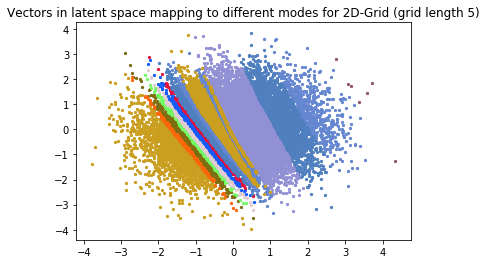

In [9]:
grid_length = 5

counts = []
latent_vecs = []
colors = []
for i in range(grid_length * grid_length):
    counts.append(0)
    colors.append((np.random.uniform(), np.random.uniform(), np.random.uniform()))
    latent_vecs.append([])
    
num_samples_to_test = 20000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = loaded_gen(z).cpu().detach().numpy()
np_latent_vec = z.cpu().numpy()

for i in range(num_samples_to_test):
    index = gan.point_to_index([np_samples[i]])
    current_z = np_latent_vec[i]
    counts[index[0][0]] += 1
    latent_vecs[index[0][0]].append(current_z)
    
plt.clf()
plt.title("Vectors in latent space mapping to different modes for 2D-Grid (grid length %d)" % grid_length)
for i in range(grid_length * grid_length):
    if len(latent_vecs[i]) == 0:
        continue
    plt.scatter(*zip(*latent_vecs[i]), color=colors[i], s=5)